In [118]:
# IMPORT DATA FILES USED BY THIS NOTEBOOK
import os,  requests

file_links = [('data_lab2_1.csv', "https://github.com/lcaza/Lily-Caza-Repository/blob/main/data_lab2_1.csv")]

# This cell has been added by nbpages. Run this cell to download data files required for this notebook.

for filepath, fileurl in file_links:
    stem, filename = os.path.split(filepath)
    if stem:
        if not os.path.exists(stem):
            os.mkdir(stem)
    if not os.path.isfile(filepath):
        with open(filepath, 'wb') as f:
            response = requests.get(fileurl)
            f.write(response.content)


,T1,T2,Q1,Q2
Time,,,,
0.00,17.998,17.998,0.0,0.0
2.01,17.998,17.998,0.0,0.0
4.01,18.030,17.998,0.0,0.0
6.01,17.998,17.998,0.0,0.0
8.00,18.159,17.998,0.0,0.0
...,...,...,...,...
1888.01,23.283,22.832,0.0,0.0
1890.01,23.154,22.832,0.0,0.0
1893.01,23.154,22.800,0.0,0.0


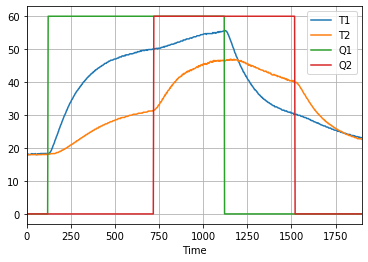

In [119]:
# Read data into Pandas DataFrame
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import least_squares

# read data file from the Github repository into a Pandas dataframe
data_location = "data_lab2_1.csv"
expt = pd.read_csv(data_location)

# set time index
expt = expt.set_index("Time")
t_expt = expt.index

# display data in tabular format
display(expt)

# simple plotting
expt.plot(grid=True)

In [120]:
# EXERCISE 3 Part 1

# Fit the first-order plus delay model to the results for "T1" using data up to t=620 
# (i.e, the data before you turn on the second heater.). 
# What are the gain, time-constant, and time delay for your device?

# the model and the values are set up and calculated below

In [149]:
# set dataframe from t=0 to t=620 (time right before u2 turns on)

# For my trial, I added 100 seconds at the beginning before the experiment started, 
# so the dataframe is set from 0 to approximately 720 seconds in my case because that is right 
# before heater 2 turns on
df_1 = expt.iloc[:304,:]

# display data in tabular format
display(df_1)

,T1,T2,Q1,Q2
Time,,,,
0.00,17.998,17.998,0.0,0.0
2.01,17.998,17.998,0.0,0.0
4.01,18.030,17.998,0.0,0.0
6.01,17.998,17.998,0.0,0.0
8.00,18.159,17.998,0.0,0.0
...,...,...,...,...
707.01,49.902,31.243,60.0,0.0
710.02,49.902,31.275,60.0,0.0
713.01,50.031,31.243,60.0,0.0


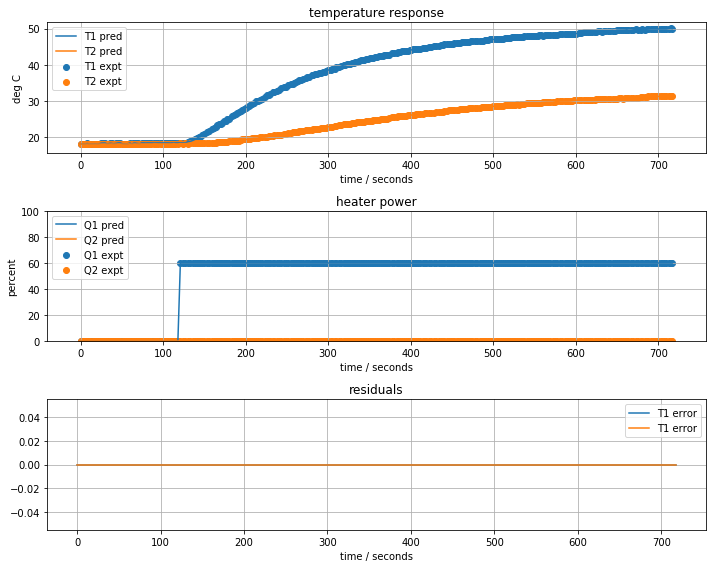

In [122]:
# create a function to compare two data sets
def plot_data(df_1, pred):
    t_expt_1 = df_1.index
    
    # create a 3 x 1 grid of plot axes
    fig, ax = plt.subplots(3, 1, figsize=(10,8))
    
    # first plot axes
    ax[0].scatter(t_expt_1, df_1["T1"], label="T1 expt")
    ax[0].scatter(t_expt_1, df_1["T2"], label="T2 expt")
    ax[0].plot(t_expt_1, pred["T1"], label="T1 pred")
    ax[0].plot(t_expt_1, pred["T2"], label="T2 pred")
    ax[0].set_ylabel("deg C")
    ax[0].set_title("temperature response")

    # second plot axes
    ax[1].scatter(t_expt_1, df_1["Q1"], label="Q1 expt")
    ax[1].scatter(t_expt_1, df_1["Q2"], label="Q2 expt")
    ax[1].plot(t_expt_1, pred["Q1"], label="Q1 pred")
    ax[1].plot(t_expt_1, pred["Q2"], label="Q2 pred")
    ax[1].set_ylim([0, 100])
    ax[1].set_ylabel("percent")
    ax[1].set_title("heater power")
    
    # third plot axes
    ax[2].plot(t_expt_1, pred["T1"]-df_1["T1"], label="T1 error")
    ax[2].plot(t_expt_1, pred["T2"]-df_1["T2"], label="T1 error")
    ax[2].set_title("residuals")
    
    # things to do for every plot axes
    for a in ax:
        a.grid(True)
        a.set_xlabel("time / seconds")
        a.legend()
        
    plt.tight_layout()
    
    return
    
# demonstrate by comparing experimental data to itself
plot_data(df_1, df_1);

Time
0.00      0.002000
2.01      0.002000
4.01     -0.030000
6.01      0.002000
8.00     -0.159000
            ...   
707.01   -1.084918
710.02   -1.068365
713.01   -1.181228
715.00   -1.202653
717.01   -1.128106
Name: T1, Length: 304, dtype: float64

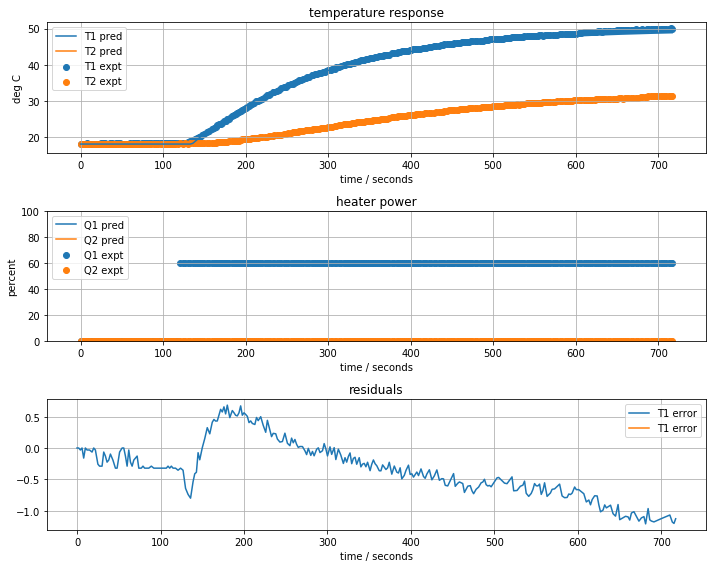

In [164]:
# Set up the first order model with the time delay

# parameter values and units
T_amb = 18                # deg C

u1bar = df_1["Q1"].mean()
t_expt_1 = df_1.index

# adjustable parameters
K = 0.64
tau = 160
t_delay = 135

def model_first_order_delay(param, plot=False):
    K, tau, t_delay = param
    pred = pd.DataFrame(columns=["T1", "T2", "Q1", "Q2"], index=t_expt_1)
    pred["T1"] = [T_amb + K*u1bar*(1 - np.exp(-(t-t_delay)/tau)) if t > t_delay else T_amb for t in t_expt_1]
    if plot:
        plot_data(df_1, pred)
    return pred["T1"] - df_1["T1"]
    
model_first_order_delay([K, tau, t_delay], True)

In [112]:
# What are the gain, time-constant, and time delay for your device?

In [182]:
# The gain, time-constant, and time delay for my device, as shown from the model's best fit are as follows:

K_model = 0.64
tau_model = 160
time_delay_model = 135 -120 # note: the first 120 seconds before heater 1 turns on must be subtracted to calculate the actual 
# heater time delay

print('From the model -')
print('')
print('The first-order plus delay model best fit GAIN was a value of:',K_model,'deg. C/% max. power.')
print('')
print('The first-order plus delay model best fit TIME-CONSTANT was a value of:',tau_model,'seconds.')
print('')
print('The first-order plus delay  model best fit TIME-DELAY was a value of:',time_delay_model,'seconds.')
print('')


# Calculate/estimate the gain, time-constant, and time-delay from the experimental data plot 
print('')
print('From graphical estimation and calculation - ')
print('')
# determine the range of temperatures from ambient to steady state, while the power of u1 was at 60%
T_steady = 51
T_ambient = 18
temp_difference = T_steady - T_ambient
# set the percent power
percent_power = 60
# calculate the gain (the difference in temperature / % of max power)
K_gain = temp_difference/percent_power
print('The calculated gain for the device during this experiment is: ',round(K_gain,3),'deg. C/% max. power.')
print('')

# Calculate the time-constant from the experimental data

# The characteristic time-constant corresponds to the temperature that occurs at 63.2% of the temperature difference
temp_for_constant = T_ambient + 0.632*temp_difference
print('The temperature at which the time constant occurs is: ',round(temp_for_constant,3),'deg. C.')
print('')
# estimate from the graph, the time constant corresponding to this temperature
time_constant = 280 - 120 # subtract the 120 seconds during which data was collected but the heater was off.
print('The time constant for the device, estimated from the graph, is approximately: ',time_constant,'seconds.')
print('')

# Read the time delay for the device off of the graph

# I included a 100 second delay in my collection of data (with the heaters turned off) in order to show steady-state
# at ambient temperature before the experiment began. Heater 1 then turned on at 120 seconds (rather than at 20 due to the
# extra 100 seconds at the beginning). Therefore, I included the first 120 seconds in my time delay when fitting this 
# first order model, but I am not including the 120 seconds in the time delay I record here, I am only incuding the delay 
# from when the first heater turned on.

time_delay = 15
print('The time delay for my device, after heater 1 turned on, is approximately: ',time_delay,'seconds.')
print('')

From the model -

The first-order plus delay model best fit GAIN was a value of: 0.64 deg. C/% max. power.

The first-order plus delay model best fit TIME-CONSTANT was a value of: 160 seconds.

The first-order plus delay  model best fit TIME-DELAY was a value of: 15 seconds.


From graphical estimation and calculation - 

The calculated gain for the device during this experiment is:  0.55 deg. C/% max. power.

The temperature at which the time constant occurs is:  38.856 deg. C.

The time constant for the device, estimated from the graph, is approximately:  160 seconds.

The time delay for my device, after heater 1 turned on, is approximately:  15 seconds.



K = 0.6670325510246816,  tau = 171.12046747668518, time delay = 135.89079664484325


Time
0.00      0.002000
2.01      0.002000
4.01     -0.030000
6.01      0.002000
8.00     -0.159000
            ...   
707.01   -0.031452
710.02   -0.010984
713.01   -0.120005
715.00   -0.138900
717.01   -0.061818
Name: T1, Length: 304, dtype: float64

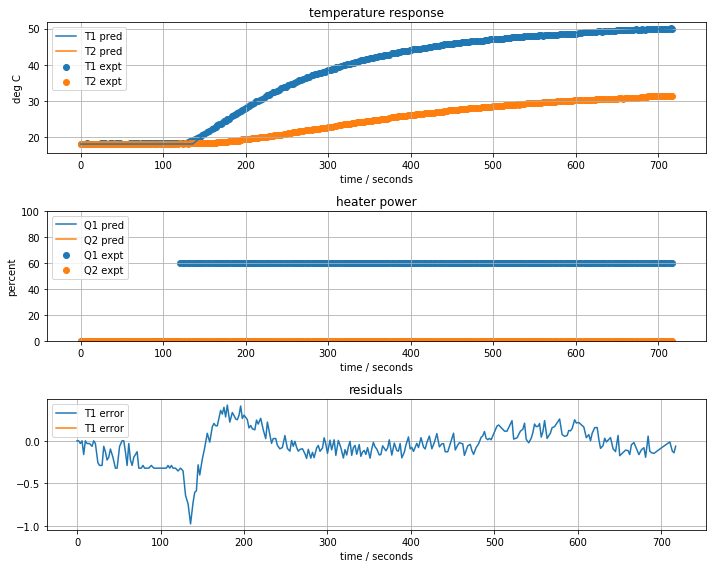

In [166]:
results = least_squares(model_first_order_delay,  [K, tau, t_delay])
K, tau, t_delay = results.x
print(f"K = {K},  tau = {tau}, time delay = {t_delay}")
model_first_order_delay(results.x, True)

In [183]:
# The gain, time-constant, and time delay for my device, as shown from the model's best fit are as follows:

K_model = 0.68
tau_model = 171
time_delay_model = 136 -120 # note: the first 120 seconds before heater 1 turns on must be subtracted to calculate the actual 
# heater time delay

print('From the least-squares regression of the first-order model with a time-delay:')
print('')
print('Gain is a value of:',K_model,'deg. C/% max. power.')
print('')
print('The time-constant is a value of:',tau_model,'seconds.')
print('')
print('The time-delay was a value of:',time_delay_model,'seconds.')
print('')


From the least-squares regression of the first-order model with a time-delay:

Gain is a value of: 0.68 deg. C/% max. power.

The time-constant is a value of: 171 seconds.

The time-delay was a value of: 16 seconds.



In [114]:
# Fit the fourth-order model (alternatively, the state-space model if you're comfortable with that formulation), 
# and report all heat capacities, heat transfer coefficients. 
# Note that you're fitting a two-input, two-output model which is very challenging. 
# So the fit may not look quite as good as those shown above when u2(t) was held constant.

array([ 0.002     ,  0.002     , -0.03      , ..., -1.3874745 ,
       -1.39342733, -1.35200605])

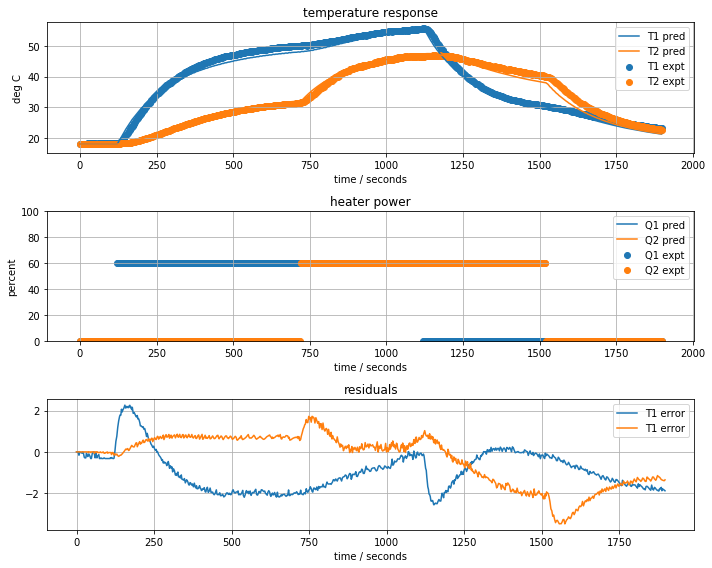

In [167]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


t_expt = expt.index

# Set parameter values
alpha = 0.00016        # watts / (units P1 * percent U1)
P1=200
P2=100

# input functions
def u1(t):
    return np.interp(t, t_expt, expt["Q1"])

def u2(t):
    return np.interp(t, t_expt, expt["Q2"])

# adjustable parameters
CpH = 9                # joules/deg C
CpS = 0.5              # joules/deg C
Ua = 0.04             # watts/deg C
Ub = 0.15              # watts/deg C
Uc = 0.04              # watts/deg C

def model_energy_fourth_order(param, plot=False):
    # unpack the adjustable parameters
    CpH, CpS, Ua, Ub, Uc = param  

    # model solution
    def deriv(t, y):
        T1H, T1S, T2H, T2S= y
        dT1H = (-(Ua + Ub + Uc)*T1H + Ub*T1S + Uc*T2H + alpha*P1*u1(t) + Ua*T_amb)/CpH
        dT1S = Ub*(T1H - T1S)/CpS
        dT2H = (-(Ua + Ub + Uc)*T2H + Ub*T2S + Uc*T1H + alpha*P2*u2(t) + Ua*T_amb)/CpH
        dT2S = Ub*(T2H - T2S)/CpS
        return [dT1H, dT1S, dT2H, dT2S]

    soln = solve_ivp(deriv, [min(t_expt), max(t_expt)], [T_amb]*4, t_eval=t_expt) 
    
    # create dataframe with predictions
    pred = pd.DataFrame(columns=["T1", "T2", "Q1", "Q2"], index=t_expt)
    pred["T1"] = soln.y[1]
    pred["T2"] = soln.y[3]

    # plot solution
    if plot:
        ax = plot_data(expt, pred)
    
    err1 = np.array(pred["T1"] - expt["T1"])
    err2 = np.array(pred["T2"] - expt["T2"])
    
    return np.concatenate((err1, err2))
    
model_energy_fourth_order([CpH, CpS, Ua, Ub, Uc], plot=True)

CpH = 9.204944082575539,  CpS = 0.8460191525528987,   Ua = 0.038564133850430324,  Ub = 0.24682434754975707,  Uc = 0.03163602253321551


array([ 0.002     ,  0.002     , -0.03      , ..., -0.56245337,
       -0.54477263, -0.50686581])

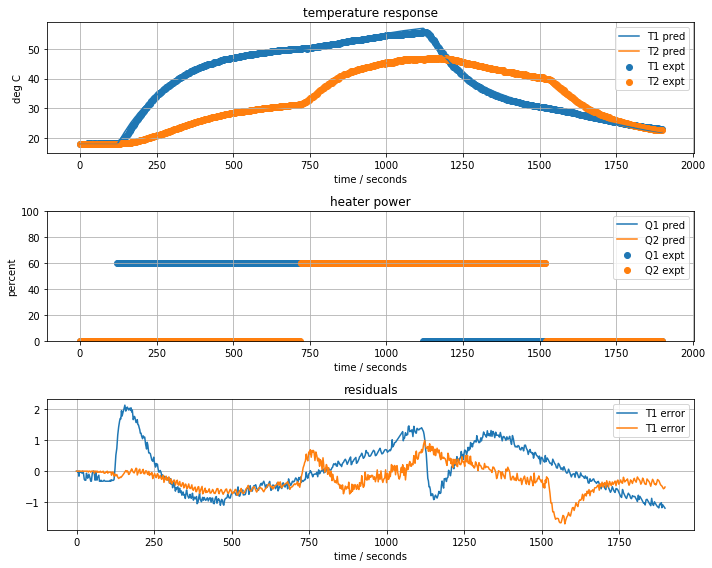

In [168]:
results = least_squares(model_energy_fourth_order,  [CpH, CpS, Ua, Ub, Uc])
CpH, CpS, Ua, Ub, Uc = results.x
print(f"CpH = {CpH},  CpS = {CpS},   Ua = {Ua},  Ub = {Ub},  Uc = {Uc}")
model_energy_fourth_order(results.x, True)

In [184]:
# Print the best-fit results for the fourth order model:

# adjustable parameters
CpH_best = 9.2                # joules/deg C
CpS_best = 0.85              # joules/deg C
Ua_best = 0.04             # watts/deg C
Ub_best = 0.25              # watts/deg C
Uc_best = 0.03              # watts/deg C

print('From the least-squares regression of the fourth order model:')
print('')
print('The heat capacity value for the heaters is',CpH_best,'joules/deg. C.')
print('')
print('The heat capacity value for the sensors is',CpS_best,'joules/deg. C.')
print('')
print('The heat transfer coefficient, Ua, is',Ua_best,'watts/deg. C.')
print('')
print('The heat transfer coefficient, Ub, is',Ub_best,'watts/deg. C.')
print('')
print('The heat transfer coefficient, Uc, is',Uc_best,'watts/deg. C.')

From the least-squares regression of the fourth order model:

The heat capacity value for the heaters is 9.2 joules/deg. C.

The heat capacity value for the sensors is 0.85 joules/deg. C.

The heat transfer coefficient, Ua, is 0.04 watts/deg. C.

The heat transfer coefficient, Ub, is 0.25 watts/deg. C.

The heat transfer coefficient, Uc, is 0.03 watts/deg. C.
